Time series modelling cryptocurrency

In [226]:
#importing the packages needed
import sys
!{sys.executable} -m pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm
from datetime import date
import math
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame as df

In [135]:
days_for_insample_forecasting = int(input ('Please insert the number of days to consider to get for in sample forecasting: '))
days_training = int(input ('Please insert the number of days to consider to get for training: '))


Please insert the number of days to consider to get for in sample forecasting: 50
Please insert the number of days to consider to get for training: 500


In [136]:
#insert the date (in sample forecasting)

end = date.today()
start = end-dt.timedelta(days=days_for_insample_forecasting)
start,end

(datetime.date(2022, 3, 18), datetime.date(2022, 5, 7))

In [137]:
#insert the date (in sample training)
end_training= start - dt.timedelta(days =1)
start_training = end_training-dt.timedelta(days=days_training)
start_training,end_training

(datetime.date(2020, 11, 2), datetime.date(2022, 3, 17))

In [138]:
#get data for eth 
crypto1= ['ETH-USD']

#get data for that crypto
chosen_crypto1 =pdr.get_data_yahoo(crypto1,start_training,end_training)
chosen_crypto1

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,,
2020-11-02,383.156738,383.156738,403.240753,381.017639,396.355988,13997574252
2020-11-03,387.602173,387.602173,389.515381,371.312744,383.156036,12588494762
2020-11-04,402.141998,402.141998,407.665649,377.827606,387.603210,15126077675
2020-11-05,414.067352,414.067352,417.525940,397.245819,402.142944,15440711038
2020-11-06,454.719299,454.719299,456.200623,412.982300,414.066711,16738305610
...,...,...,...,...,...,...
2022-03-14,2590.696045,2590.696045,2604.034424,2505.299316,2518.486328,11244398839
2022-03-15,2620.149658,2620.149658,2662.329590,2515.765869,2590.668945,12861105614


In [139]:
#get data for btc
crypto2= ['BTC-USD']

#get data for that crypto
chosen_crypto2 =pdr.get_data_yahoo(crypto2,start_training,end_training)
chosen_crypto2

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-11-02,13550.489258,13550.489258,13808.323242,13243.160156,13737.032227,30771455468
2020-11-03,13950.300781,13950.300781,13984.981445,13325.441406,13550.451172,29869951617
2020-11-04,14133.707031,14133.707031,14218.766602,13580.471680,13950.488281,35116364962
2020-11-05,15579.848633,15579.848633,15706.404297,14102.088867,14133.733398,40856321439
2020-11-06,15565.880859,15565.880859,15903.437500,15226.839844,15579.729492,39837841971
...,...,...,...,...,...,...
2022-03-14,39666.753906,39666.753906,39742.500000,37680.734375,37846.316406,24322159070
2022-03-15,39338.785156,39338.785156,39794.628906,38310.210938,39664.250000,23934000868


In [140]:
#only the closing prices
crypto1_close = chosen_crypto1.Close
crypto1_close.head()
crypto2_close = chosen_crypto2.Close
crypto2_close.head()

Symbols,BTC-USD
Date,
2020-11-02,13550.489258
2020-11-03,13950.300781
2020-11-04,14133.707031
2020-11-05,15579.848633
2020-11-06,15565.880859


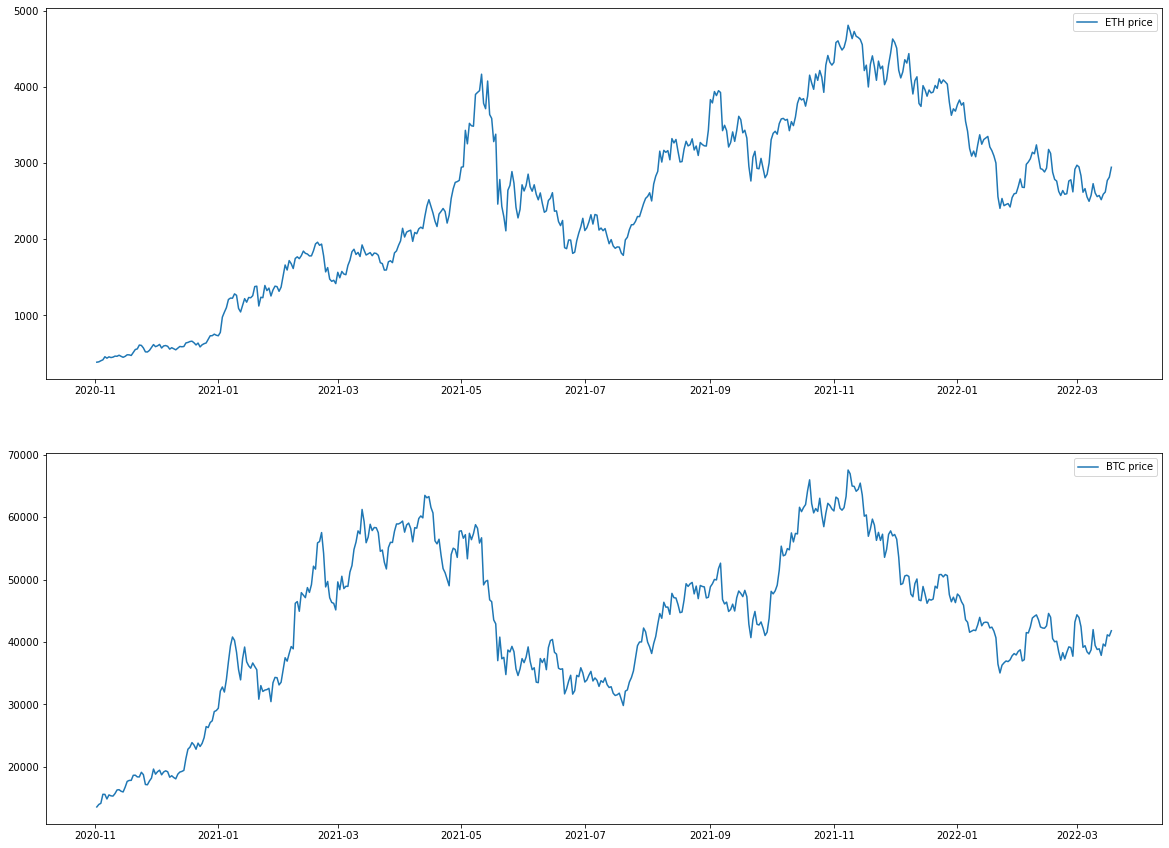

In [141]:
#plotting the prices
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20, 15))
plt.subplot(211)
plt.plot(crypto1_close, label ='ETH price')
plt.legend()
plt.subplot(212)
plt.plot(crypto2_close, label ='BTC price')
plt.legend()

In [222]:
#calculating returns for crypto1
returns1=crypto1_close/crypto1_close.shift(1)-1
returns1 = returns1.dropna()
returns1

Symbols,ETH-USD
Date,
2020-11-03,0.011602
2020-11-04,0.037512
2020-11-05,0.029655
2020-11-06,0.098177
2020-11-07,-0.041798
...,...
2022-03-14,0.028485
2022-03-15,0.011369
2022-03-16,0.057976


In [143]:
#calculating returns for crypto2
returns2=crypto2_close/crypto2_close.shift(1)-1
returns2 = returns2.dropna()
returns2

Symbols,BTC-USD
Date,
2020-11-03,0.029505
2020-11-04,0.013147
2020-11-05,0.102319
2020-11-06,-0.000897
2020-11-07,-0.047034
...,...
2022-03-14,0.048008
2022-03-15,-0.008268
2022-03-16,0.045887


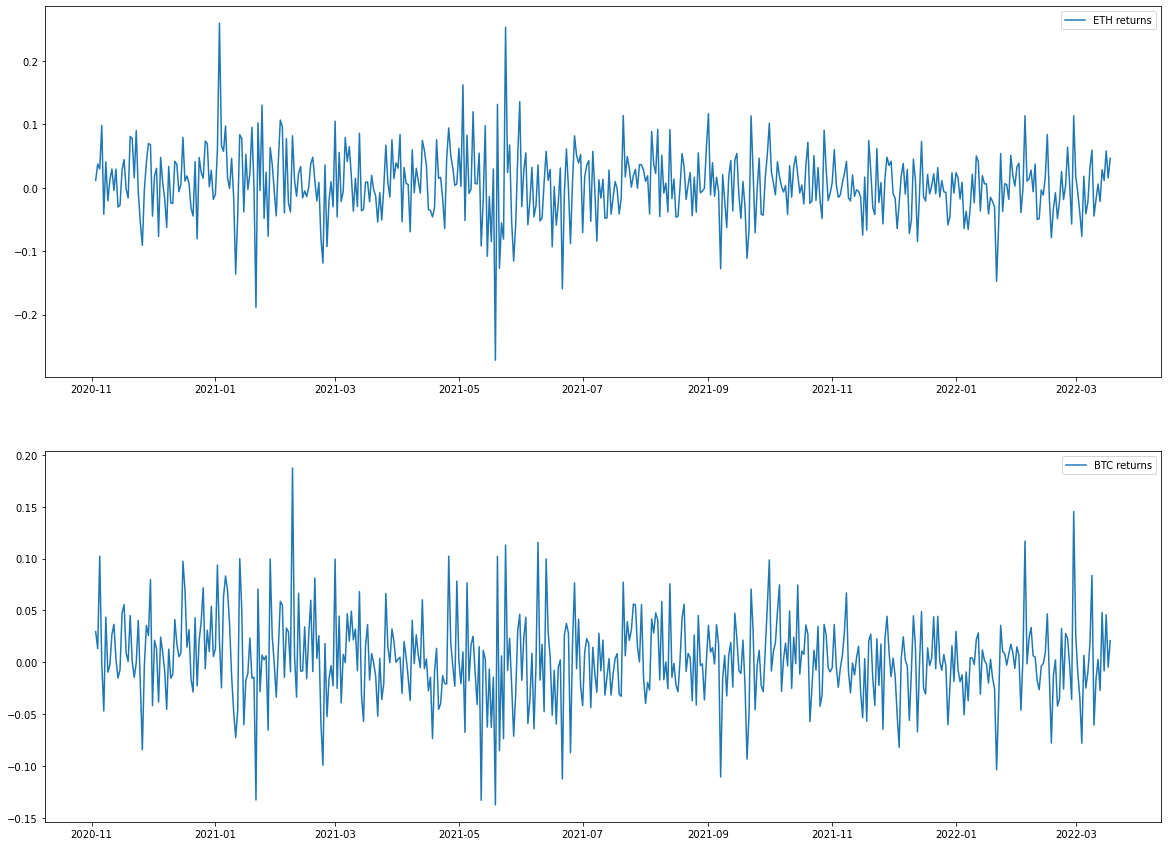

In [144]:
#plotting the prices
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20, 15))
plt.subplot(211)
plt.plot(returns1, label ='ETH returns')
plt.legend()
plt.subplot(212)
plt.plot(returns2, label ='BTC returns')
plt.legend()

In [145]:
#adf test for crypto1
stationarity1 = adfuller(returns1)
stationarity1
print('ADF Statistic: %f' % stationarity1[0])
print('p-value: %f' % stationarity1[1])

ADF Statistic: -6.484836
p-value: 0.000000


In [146]:
#adf test for crypto2
stationarity2 = adfuller(returns2)
stationarity2
print('ADF Statistic: %f' % stationarity2[0])
print('p-value: %f' % stationarity2[1])

ADF Statistic: -22.881325
p-value: 0.000000


In [147]:
#kpss test for crypto1
stationarity1_kpss= kpss(returns1)
stationarity1_kpss
print('ADF Statistic: %f' % stationarity1_kpss[0])
print('p-value: %f' % stationarity1_kpss[1])

ADF Statistic: 0.576487
p-value: 0.024774


C:\Users\marti\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [148]:
#kpss test for crypto2
stationarity2_kpss= kpss(returns2)
stationarity2_kpss
print('ADF Statistic: %f' % stationarity2_kpss[0])
print('p-value: %f' % stationarity2_kpss[1])

ADF Statistic: 0.470286
p-value: 0.048359


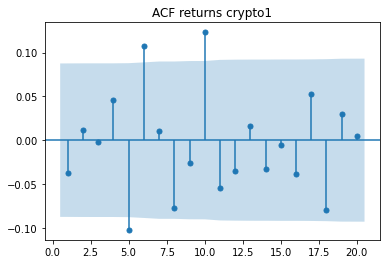

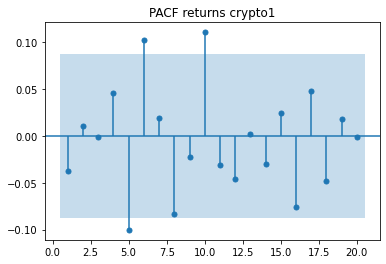

In [149]:

#acf returns2

acf1=plot_acf(returns1,lags=20,zero=False,title ='ACF returns crypto1')

#pacf returns2

pacf1=plot_pacf(returns1,lags=20,zero=False,title ='PACF returns crypto1')



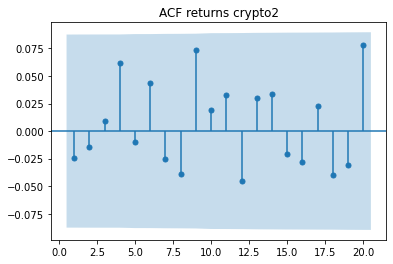

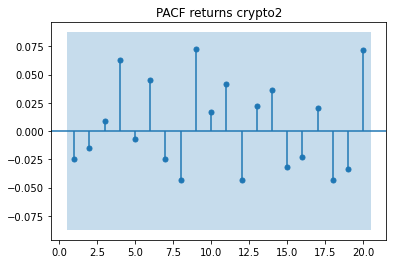

In [150]:
#acf returns2

acf2=plot_acf(returns2,lags=20,zero=False,title ='ACF returns crypto2')

#pacf returns2

pacf2=plot_pacf(returns2,lags=20,zero=False,title ='PACF returns crypto2')

In [ ]:
#fitting ARIMA model

In [223]:
#crypto1
returns1_arima = returns1.asfreq('d')
arima1=ARIMA(returns1_arima,order=(2,3,2),freq='D')
model1_fit=arima1.fit()
print(model1_fit.summary())

C:\Users\marti\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                ETH-USD   No. Observations:                  501
Model:                 ARIMA(2, 3, 2)   Log Likelihood                 672.000
Date:                Sat, 07 May 2022   AIC                          -1333.999
Time:                        23:59:02   BIC                          -1312.946
Sample:                    11-03-2020   HQIC                         -1325.737
                         - 03-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6965      0.039    -17.869      0.000      -0.773      -0.620
ar.L2         -0.3332      0.039     -8.485      0.000      -0.410      -0.256
ma.L1         -1.9964      0.170    -11.731      0.0

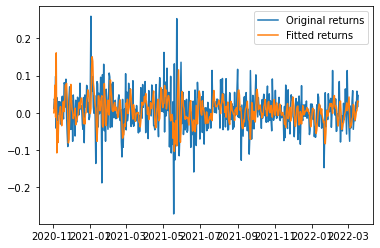

In [224]:
#fitted returns crypto1 and plot against original returns
arima1_fitted=model1_fit.fittedvalues
arima1_fitted
plt.plot(returns1,label='Original returns')
plt.plot(arima1_fitted,label='Fitted returns')
plt.legend()


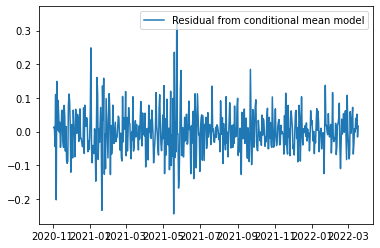

In [233]:
#residuals from arima1
residuals_arima1 = df(model1_fit.resid.dropna())
plt.plot(residuals_arima1,label ='Residual from conditional mean model')
plt.legend()


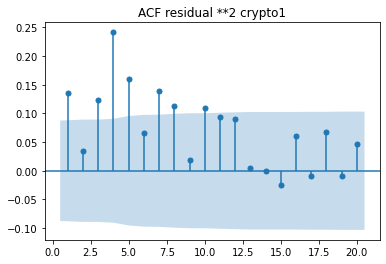

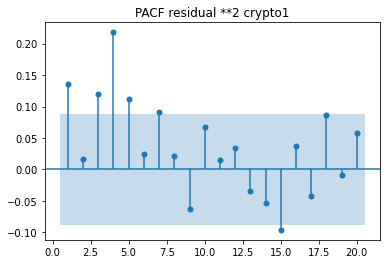

In [234]:
#acf and pacf on residual from arima1
acf1_residuals=plot_acf(residuals_arima1**2,lags=20,zero=False,title ='ACF residual **2 crypto1')

pacf1_residuals=plot_pacf(residuals_arima1**2,lags=20,zero=False,title ='PACF residual **2 crypto1')